## Ridge Regression

*Ridge regression* (also called Tikhonov regularization): a *regularization term* equal to $\alpha\sum_{i=1}^{n}\theta_{i}^{2}$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha=0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

Ridge Regression cost function:
$$J(\theta)=\text{MSE}(\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_{i}^{2}$$

Note that the bias term $\theta_{0}$ is not regularized

In [13]:
from copy import deepcopy

import numpy as np
from pandas.conftest import arrow_string_storage

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [14]:
from sklearn.linear_model import Ridge, LinearRegression

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55071465])

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt


def plot_model(model_class, polynomial, alphas, **model_kwargs):
	for alpha, style in zip(alphas, ('b-', 'g--', "r:")):
		model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
		if polynomial:
			model = Pipeline([
				("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
				("std_scaler", StandardScaler()),
				("regul_reg", model)
			])
		model.fit(X, y)
		y_new_regul = model.predict(X_new)
		lw = 2 if alpha > 0 else 1
		plt.plot(X_new, y_new_regul, style, linewidth=lw, label=f"$ \\alpha={alpha}$")
	plt.plot(X, y, "b.", linewidth=3)
	plt.legend(loc="upper left", fontsize=15)
	plt.xlabel("$x_1$", fontsize=18)
	plt.axis([0, 3, 0, 4])

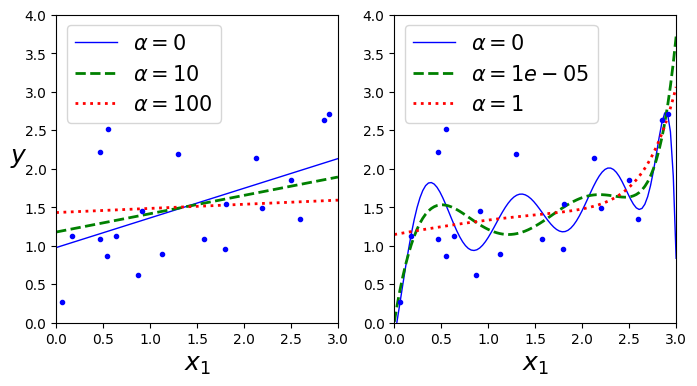

In [24]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10 ** -5, 1), random_state=42)
plt.show()

#### Ridge regression closed-form solution
$$\hat{\alpha}=(X^{T}X+\alpha A)^{-1} X^{T}y$$

In [25]:
# Ridge Regression using closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55071465])

In [29]:
from sklearn.linear_model import SGDRegressor

# Ridge Regression using gradient descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46889786])

## Lasso Regression
*Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression)*

Lasso Regression cost function:
$$J(0)=\text{MSE}(\theta) + \alpha\sum_{i=1}^{n}|\alpha_{í}|$$

C:\Users\Aleksandre\Documents\GitHub\python-hands-on-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.764e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


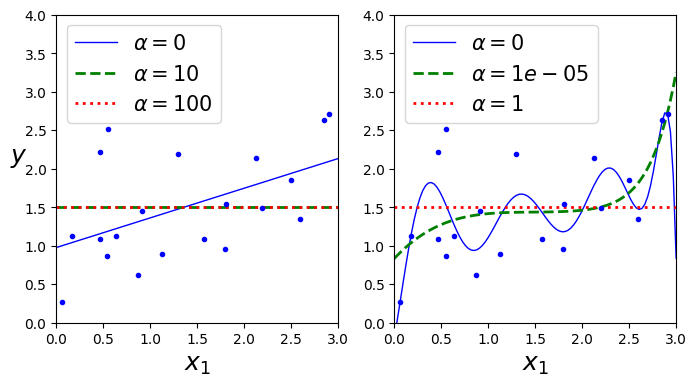

In [30]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10 ** -5, 1), random_state=42)
plt.show()

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features. in the right-hand plot with  $\alpha=10^{-5}$ look quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero.

Lasso Regression automatically performs feature selection and outputs a *sparse model*

## Elsatic Net

*Elastic Net* is a middle ground between Ridge Regression and Lasso Regression. The Regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio r. When r=0, Elastic Net is equivalent to Ridge Regression, and when r=1, it is equivalent to Lasso Regression

Elastic Net cost function:
$$J(\theta)=\text{MSE}(\theta) + r\alpha\sum_{i=1}^{n}|\theta_{i}| +  \frac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_{i}^{2}$$

It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features weights down to zero. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called an *early stopping*.




In [49]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]


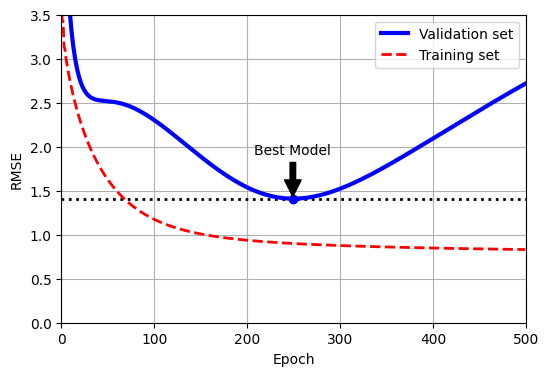

In [54]:
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float("inf")
train_errors, val_errors = [], []

for epoch in range(n_epochs):
	sgd_reg.partial_fit(X_train_prep, y_train)
	y_valid_predict = sgd_reg.predict(X_valid_prep)
	val_error = root_mean_squared_error(y_valid, y_valid_predict)
	if val_error < best_valid_rmse:
		best_valid_rmse = val_error
		best_model = deepcopy(sgd_reg)

	y_train_predict = sgd_reg.predict(X_train_prep)
	train_error = root_mean_squared_error(y_train, y_train_predict)
	val_errors.append(val_error)
	train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate("Best Model",
			 xy=(best_epoch, best_valid_rmse),
			 xytext=(best_epoch, best_valid_rmse + 0.5),
			 ha="center",
			 arrowprops=dict(facecolor="black", shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()

In [56]:
best_epoch, best_model

(np.int64(249), SGDRegressor(eta0=0.002, penalty=None, random_state=42))